In [36]:
import numpy as np 
import pandas as pd
from IPython.display import display
import visuals as vs


In [3]:
file_name = "titanic_data.csv"
full_data = pd.read_csv(file_name)
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
outcomes = full_data["Survived"]
data = full_data.drop("Survived", axis=1)
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
def accuracy_score(truth, predict):
    if len(truth) == len(predict):
        acc = (truth == predict).mean() * 100
        return acc
    else:
        print('length truth not equal to length of predict')

In [26]:
truth = outcomes[:5]
predict = pd.Series(np.ones(5, dtype=int))
acc = accuracy(truth, predict)
print(f'prediction accuracy equal {acc}%')

prediction accuracy equal 60.0%


In [35]:
def predictions_0(data):
    predictions = []
    for _, i in data.iterrows():
        predictions.append(0)
    return pd.Series(predictions)



In [34]:
predictions = predictions_0(data)

acc = accuracy_score(outcomes, predictions)
print(f'predictions accuracy equal {acc}%')

predictions accuracy equal 61.61616161616161%


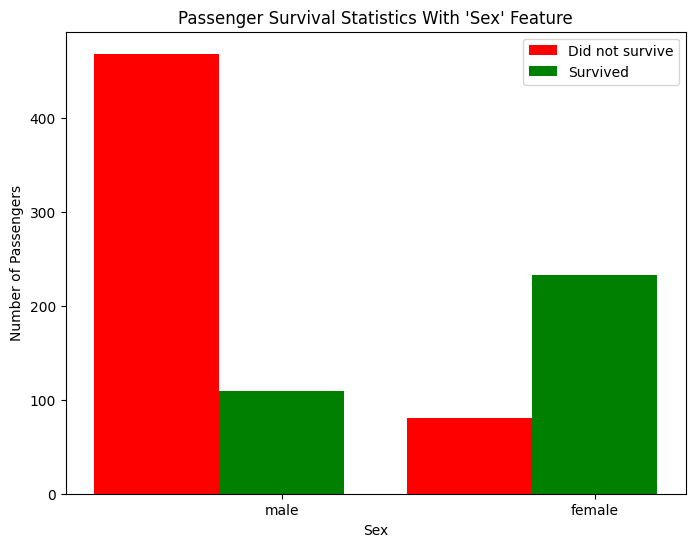

In [38]:
vs.survival_stats(data, outcomes, 'Sex')

In [39]:
def predictions_1(data):
    predictions = []
    for _, passenger in data.iterrows():
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions




In [45]:
predictions = predictions_1(data)
acc = accuracy_score(outcomes, predictions)
print(f"predictions accuracy equal {acc}%")

predictions accuracy equal 78.67564534231201%


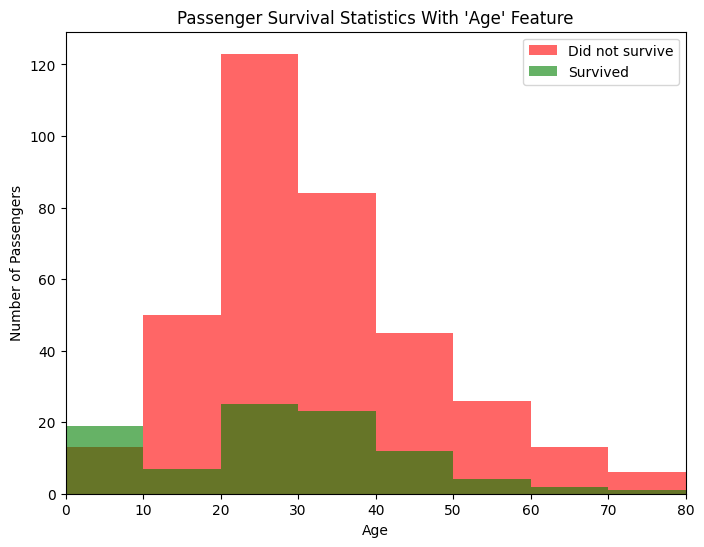

In [48]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

In [232]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    predictions = []
    for _, passenger in data.iterrows():
        if (passenger['Sex'] == 'female' and not passenger['Parch'] >3 and not passenger['SibSp'] > 1) or (passenger['Sex'] == 'male' and passenger['Age'] <= 10) or (passenger['Pclass'] == 1 and passenger["Age"] < 18 and passenger["SibSp"] == 1)  :
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [233]:
predictions = predictions_2(data)
acc = accuracy_score(outcomes, predictions)
print(f'predictions accuracy equal {acc}%')

predictions accuracy equal 80.13468013468014%


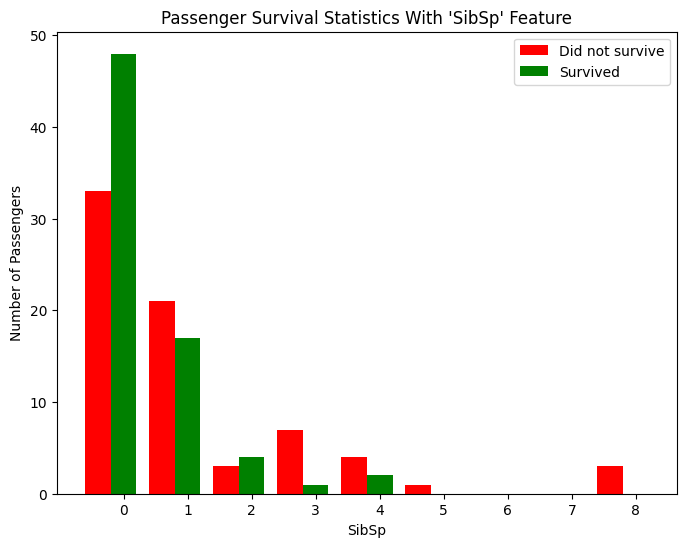

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [231]:
vs.survival_stats(data, outcomes, 'SibSp', ["Sex == 'female'", 'Pclass == 3' ])
data.head()